# Parse the results of the experiment

In [ ]:
# Settings

data_dir = '/home/ubuntu/data_dir' # path to the output of `collect.py`
spec_dir = '/home/ubuntu/emrest_artifact/api-suts/specifications' # path to `api-suts/specifications`
np_file = '../../../numberOfParamPerOp.json'

api_suts = spec_dir

import shutil
import seaborn as sns
import matplotlib.pyplot as plt

usetex = shutil.which("latex") is not None

# Enable LaTeX rendering
plt.rcParams.update({
    "text.usetex": usetex,  # Use LaTeX for rendering text
    "font.size": 145,  # Global font size
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}"  # Load extra LaTeX packages
})

# the order of the SUTs
sut_order = {"features-service": 0,
         "feature-services": 0,
         "genome-nexus": 1,
         "languagetool": 2,
         "market": 3,
         "person-controller": 4,
         "emb-project": 5,
         "restcountries": 6,
         "user-management": 7,
         "ncs": 8,
         "scs": 9,
         "gitlab-branch": 10,
         "gitlab-commit": 11,
         "gitlab-groups": 12,
         "gitlab-issues": 13,
         "gitlab-project": 14,
         "gitlab-repository": 15
         }
formal_sut_names = {
    "features-service": r"\emph{FeatSrv}",
    "feature-services": r"\emph{FeatSrv}",
    "genome-nexus": r"\emph{GenomeNex}",
    "languagetool": r"\emph{LangTool}",
    "market": r"\emph{MktSrv}",
    "person-controller": r"\emph{PersCtrl}",
    "emb-project": r"\emph{ProjTrack}",
    "restcountries": r"\emph{RestCtry}",
    "user-management": r"\emph{UserMgmt}",
    "ncs": r"\emph{NCS}",
    "scs": r"\emph{SCS}",
    "gitlab-branch": r"\emph{GLBranch}",
    "gitlab-commit": r"\emph{GLCommit}",
    "gitlab-groups": r"\emph{GLGroups}",
    "gitlab-issues": r"\emph{GLIssues}",
    "gitlab-project": r"\emph{GLProject}",
    "gitlab-repository": r"\emph{GLRepo}",
}
tool_order = {
    'emrest': 0,
    'arat-rl': 10,
    'morest': 30,
    'evomaster': 20,
    'schemathesis': 50,
    'miner': 60,
    'restct': 40,
    'emrest-infer': 1,      
    'emrest-random': 2,
    'emrest-noretry': 3,	
}
formal_tool_names = {
    'emrest': r'\textsc{EmRest}',
    'arat-rl': 'ARAT-RL',
    'morest': r'\textsc{Morest}',
    'evomaster': r'\textsc{EvoMaster}',
    'schemathesis': 'Schemathesis',
    'miner': 'MINER',
    'restct': r'\textsc{RestCT}',
    'emrest-infer': r'\textsc{EmRest}$_{\text{Infer}}$',
    'emrest-random': r'\textsc{EmRest}$_{\text{Random}}$',
    'emrest-noretry': r'\textsc{EmRest}$_{\text{NoRetry}}$',
    
}
# the color palette for the tools
tool_palette = {
    'emrest': sns.color_palette("Set1")[0],
    'arat-rl': sns.color_palette("Set1")[1],
    'morest': sns.color_palette("Set1")[2],
    'evomaster': sns.color_palette("Set1")[3],
    'schemathesis': sns.color_palette("Set1")[4],
    'miner': sns.color_palette("Set1")[5],
    'emrest-infer': sns.color_palette("Set1")[6],
    'emrest-random': sns.color_palette("Set1")[7],
    'restct': sns.color_palette("Set1")[8],
}

## Read the results

In [51]:
import json
import os
import pandas as pd

cb_dfs, bug_info = [], []
# read all projects
for tool_name in os.listdir(data_dir):
    tool_folder = os.path.join(data_dir, tool_name)
    if not os.path.isdir(tool_folder):
        continue
    for round_name in os.listdir(tool_folder):
        if not round_name.startswith('round'):
            continue
        round_path = os.path.join(tool_folder, round_name)
        round_id = int(round_name.replace("round", ''))
        round_df = pd.read_csv(os.path.join(round_path, "coverage_and_bug.csv"))
        round_df['tool'] = tool_name
        round_df['round'] = round_id
        cb_dfs.append(round_df) # cb: coverage (operation coverage and line coverage) and bug numbers

        for file in os.listdir(round_path):
            if file.endswith('_bug.json'):
                sut_name = file.replace('_bug.json', '')
                with open(os.path.join(round_path, file), 'r') as f:
                    bug_json = json.load(f)
                    for op, bugs in bug_json.items():
                        for bug in bugs:
                            bug_info.append({'sut': sut_name, 'tool': tool_name, 'round': round_id, 'bug_id': f"{sut}:{op}:{bug}"})
                                
cb_df = pd.concat(cb_dfs)
cb_df = cb_df[['SUT', 'Op_20X', 'Op_All', 'Unique Bugs', 'Line Coverage', 'tool', 'round']]
cb_df.columns = ['sut', 'op_20x', 'op_all', 'unique_bugs', 'line_covered', 'tool', 'round'] 

bug_df = pd.DataFrame(bug_info)

In [52]:
cb_df.shape

(26, 7)

In [53]:
cb_df.columns

Index(['sut', 'op_20x', 'op_all', 'unique_bugs', 'line_covered', 'tool',
       'round'],
      dtype='object')

In [54]:
cb_df.head()

sut  op_20x  op_all  unique_bugs  line_covered    tool  round
0       emb-project    23.0    60.0          4.0         31.44  morest      2
1  features-service     8.0    18.0         15.0         43.54  morest      2
2      genome-nexus    13.0    23.0          1.0         22.40  morest      2
3     gitlab-issues     0.0    27.0          0.0          0.00  morest      2
4    gitlab-project     0.0    31.0          0.0          0.01  morest      2

In [47]:
bug_df.head()

sut    tool  round  \
0  user-management  morest      2   
1  user-management  morest      2   
2  user-management  morest      2   
3  user-management  morest      2   
4  user-management  morest      2   

                                              bug_id  
0  emb-project:delete:/error:{"timestamp":"*","st...  
1  emb-project:post:/error:{"timestamp":"*","stat...  
2  emb-project:get:/error:{"timestamp":"*","statu...  
3  emb-project:put:/error:{"timestamp":"*","statu...  
4  emb-project:patch:/error:{"timestamp":"*","sta...

In [49]:
bug_df['round'].unique()

array([2, 1])

## Check the number of rounds for each sut and each tool 

In [56]:
for tool in cb_df['tool'].unique():
    print(f"The number of rounds for tool: {tool}")
    for sut in cb_df['sut'].unique():
        number = cb_df[(cb_df['tool'] == tool) & (cb_df['sut'] == sut)].shape[0]
        print(f"    {sut}: {number}")

The number of rounds for tool: morest
    emb-project: 2
    features-service: 2
    genome-nexus: 2
    gitlab-issues: 2
    gitlab-project: 2
    gitlab-repository: 2
    languagetool: 2
    market: 2
    ncs: 2
    person-controller: 2
    restcountries: 2
    scs: 2
    user-management: 2


## RQ1

### Operation Coverage In Table

In [57]:
selected_tools = [
    'emrest',
    'arat-rl',
    'morest',
    'restct',
    'miner',
    'evomaster',
    'schemathesis',
    'emrest-infer',
]
rq1_df = cb_df[cb_df['tool'].isin(selected_tools)]
rq1_df.tool.unique()

array(['morest'], dtype=object)

In [58]:
# get the mean and std of the operation coverage and code coverage
rq1_avg_df = rq1_df.groupby(['tool', 'sut']).agg({'op_20x': ['mean', 'std'],
                                              'line_covered': ['mean', 'std']}).reset_index()

In [59]:
# multi-level column index to single level column index
rq1_avg_df.columns = [' '.join(col).strip() for col in rq1_avg_df.columns.values]
rq1_avg_df.head()

tool               sut  op_20x mean  op_20x std  line_covered mean  \
0  morest       emb-project         22.0    1.414214             31.245   
1  morest  features-service          7.0    1.414214             40.590   
2  morest      genome-nexus         13.0    0.000000             21.055   
3  morest     gitlab-issues          0.0    0.000000              0.005   
4  morest    gitlab-project          0.0    0.000000              0.005   

   line_covered std  
0          0.275772  
1          4.171930  
2          1.902117  
3          0.007071  
4          0.007071

### Operation Coverage In Bar Plot

In [64]:
import matplotlib.ticker as mticker

fig, axs = plt.subplots(2, 8, figsize=(200, 60), sharex=True)  # Independent y-axis

sorted_sut = sorted(rq1_df['sut'].unique(), key=lambda x: sut_order[x])
for i, (sut, group) in enumerate(rq1_df.groupby('sut')):
    # assert group.shape[0] / rq1_df.tool.nunique() == 30, f"Missing rounds for {sut}: {group.shape[0]}"
    ax = axs[sorted_sut.index(sut)//8, sorted_sut.index(sut)%8]
    sns.barplot(
        data=group, 
        y='op_20x', 
        ax=ax, 
        alpha=0.6, 
        hue='tool', 
        palette=tool_palette,
        hue_order=sorted([t for t in group['tool'].unique()], key=lambda x: tool_order[x]),
        errorbar='sd'
        )  
    ax.set_title(f"{formal_sut_names[sut]}", fontsize=120, pad=40)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.legend().remove()
    ax.set_ylim(bottom=0)
    # y-axis integer only
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

handles, labels = axs[0, 0].get_legend_handles_labels()
# check whether the legend is the same for all subplots
for i in range(len(axs)):
    assert labels == axs[i//8, i%8].get_legend_handles_labels()[1], "The legend is not the same for all subplots"

# Add a big legend at the top
fig.legend(
    handles,
    [formal_tool_names[l] for l in labels],
    loc='upper center',
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout to prevent shrinking
# plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.savefig('rq1_op_cov.pdf', bbox_inches='tight')

### Code Coverage In Bar Plot

In [66]:
fig, axs = plt.subplots(2, 8, figsize=(200, 60), sharex=True)  # Independent y-axis
legend = None
sorted_sut = sorted(rq1_df['sut'].unique(), key=lambda x: sut_order[x])
for i, (sut, group) in enumerate(rq1_df.groupby('sut')):
    # assert group.shape[0] / rq1_df.tool.nunique() == 30, f"Missing rounds for {sut}: {group.shape[0]}"
    ax = axs[sorted_sut.index(sut)//8, sorted_sut.index(sut)%8]
    sns.barplot(
        data=group, 
        y='line_covered', 
        ax=ax, 
        alpha=0.6, 
        hue='tool', 
        palette=tool_palette,
        hue_order=sorted([t for t in group['tool'].unique()], key=lambda x: tool_order[x]),
        errorbar='sd'
        )  
    ax.set_title(f"{formal_sut_names[sut]}", fontsize=120, pad=40)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.legend().remove()
    if sut.startswith('gitlab'):
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}\%" if x > 0 else ""))
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.0f}\%" if x > 0 else ""))



handles, labels = axs[0, 0].get_legend_handles_labels()
# check whether the legend is the same for all subplots
for i in range(len(axs)):
    assert labels == axs[i//8, i%8].get_legend_handles_labels()[1], "The legend is not the same for all subplots"

# Add a big legend at the top
fig.legend(
    handles,
    [formal_tool_names[l] for l in labels],
    loc='upper center',
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout to prevent shrinking
# plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.savefig('rq1_code_cov.pdf', bbox_inches='tight')

## RQ2: Bug Dection

In [ ]:
selected_tools = [
    'emrest',
    'arat-rl',
    'morest',
    'restct',
    'miner',
    'evomaster',
    'schemathesis',
    'emrest-infer',
]
rq2_df = bug_df[bug_df['tool'].isin(selected_tools)]
rq2_df = rq2_df.groupby(['tool', 'sut', 'round']).nunique().reset_index()
rq2_df.columns = ['tool', 'sut', 'round', 'unique_bug']
rq2_df.head()

tool                sut  round  unique_bug
0   morest        emb-project      1           3
1   morest        emb-project      2           4
2   morest   features-service      1          13
3   morest   features-service      2          15
4   morest       genome-nexus      1           1
5   morest       genome-nexus      2           1
6   morest  person-controller      1           9
7   morest  person-controller      2           9
8   morest      restcountries      1           1
9   morest      restcountries      2           1
10  morest    user-management      1           6
11  morest    user-management      2           7

In [69]:
cols = int(len(rq2_df.sut.unique()) / 2)

fig, axs = plt.subplots(2, cols, figsize=(190, 60), sharex=True)  # Independent y-axis

sorted_sut = sorted(rq2_df['sut'].unique(), key=lambda x: sut_order[x])
for i, (sut, group) in enumerate(rq2_df.groupby('sut')):
    ax = axs[sorted_sut.index(sut)//cols, sorted_sut.index(sut)%cols]
    sns.barplot(
        data=group, 
        y='unique_bug', 
        ax=ax, 
        alpha=0.6, 
        hue='tool', 
        palette=tool_palette,
        hue_order=sorted([t for t in group['tool'].unique()], key=lambda x: tool_order[x]),
        errorbar='sd'
        )  
    ax.set_title(f"{formal_sut_names[sut]}", fontsize=120, pad=40)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.legend().remove()
    ax.set_ylim(bottom=0)

handles, labels = axs[0, 0].get_legend_handles_labels()
# check whether the legend is the same for all subplots
for i in range(len(axs)):
    assert labels == axs[i//8, i%8].get_legend_handles_labels()[1], "The legend is not the same for all subplots"

# Add a big legend at the top
fig.legend(
    handles,
    [formal_tool_names[l] for l in labels],
    loc='upper center',
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout to prevent shrinking
# plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.savefig('rq2_bug.pdf', bbox_inches='tight')

### Updset Plotting

In [73]:
selected_tools = [
    'emrest',
    'arat-rl',
    'morest',
    'restct',
    'miner',
    'evomaster',
    'schemathesis',
    'emrest-infer',
]
all_bug = bug_df[bug_df['tool'].isin(selected_tools)]
# group by tool and sut to get the unique bugs themselves, not the number of bugs
all_bug = bug_df.drop_duplicates(subset=['sut', 'tool', 'bug_id']).reset_index()
all_bug.head()

index              sut    tool  round  \
0      0  user-management  morest      2   
1      1  user-management  morest      2   
2      2  user-management  morest      2   
3      3  user-management  morest      2   
4      4  user-management  morest      2   

                                              bug_id  
0  user-management:delete:/error:{"timestamp":"*"...  
1  user-management:post:/error:{"timestamp":"*","...  
2  user-management:get:/error:{"timestamp":"*","s...  
3  user-management:put:/error:{"timestamp":"*","s...  
4  user-management:patch:/error:{"timestamp":"*",...

/home/ubuntu/miniconda3/envs/exp/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/ubuntu/miniconda3/envs/exp/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

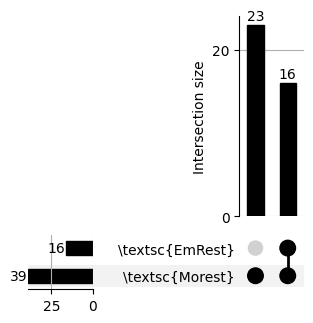

In [ ]:
# plot the upsets of the unique bugs
from upsetplot import UpSet, from_indicators

bug_list = all_bug.groupby('tool')['bug_id'].apply(set).to_dict()
# all unque bug ids
all_bug_ids = set()
for bug_ids in bug_list.values():
    # all_bug_ids.update({i for i in bug_ids if "========RESPONSE========" not in i})
    all_bug_ids.update(bug_ids)
all_bug_ids = sorted(all_bug_ids)
# construct member matrix
data = {}
for tool, bug_ids in bug_list.items():
    data[formal_tool_names[tool]] = [bug in bug_ids for bug in all_bug_ids]
membership_series = from_indicators(data)

# plot the upset
upset = UpSet(
    membership_series, 
    subset_size='count', 
    show_counts=True,
    )
    
with plt.rc_context({'font.size': 10}):
    upset.plot()
plt.savefig('rq2_upset.pdf', bbox_inches='tight')

In [80]:
for tool, series in data.items():
    print(f"{tool}: {series}")

\textsc{Morest}: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
\textsc{EmRest}: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


### find operations that can only be covered by EmRest

In [83]:
# it takes a long time to read the data
# read all projects
from tqdm.notebook import tqdm

req_dfs = []
for tool_name in tqdm(os.listdir(data_dir), desc='tool', leave=False):
    tool_folder = os.path.join(data_dir, tool_name)
    if not os.path.isdir(tool_folder):
        continue
    for round_name in os.listdir(tool_folder):
        round_path = os.path.join(tool_folder, round_name)
        if os.path.isdir(round_path):
            df = pd.read_csv(os.path.join(round_path, "request_info.csv"))
            df['tool'] = tool_name
            df['round'] = round_name
            req_dfs.append(df)

req_df = pd.concat(req_dfs)  

tool:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
# remove the req dfs, release the memory
req_dfs = []
req_df['status_group'] = req_df['status_group'].astype('category')
req_df['tool'] = req_df['tool'].astype('category')
req_df['sut'] = req_df['sut'].astype('category')
req_df['round'] = req_df['round'].astype('category')

In [85]:
req_df = req_df[req_df['status_group'] == '20X']
req_df = req_df.drop_duplicates(subset=['tool', 'sut', 'round', 'op'])

In [86]:
ops_only_covered_by_emrest = {s: [] for s in req_df['sut'].unique()}
ops_not_covered_by_emrest = {s: set() for s in req_df['sut'].unique()}
emrest_ops = {s: set(req_df[(req_df['tool'] == 'emrest') & (req_df['sut'] == s)]['op'].unique()) for s in req_df['sut'].unique()}
for tool in req_df.tool.unique():
    if tool.startswith('emrest'):
        continue
    for sut in req_df.sut.unique():
        ops = set(req_df[(req_df['tool'] == tool) & (req_df['sut'] == sut)]['op'].unique())
        ops_only_covered_by_emrest[sut].append(set(emrest_ops[sut] - ops)) 
        ops_not_covered_by_emrest[sut].update(ops - emrest_ops[sut])
       
ops_only_covered_by_emrest = {s: set.intersection(*ops_only_covered_by_emrest[s]) for s in ops_only_covered_by_emrest}

In [87]:
req_df.columns

Index(['timestamp', 'sut', 'op', 'op_total', 'status', 'status_group', 'tool',
       'round'],
      dtype='object')

In [ ]:
ops_covered_by_emrest_not_by_rl = {}
for sut in req_df.sut.unique():
    emrest_ops = set(req_df[(req_df['tool'] == 'emrest') & (req_df['sut'] == sut)]['op'].unique())
    rl_ops = set(req_df[(req_df['tool'] == 'arat-rl') & (req_df['sut'] == sut)]['op'].unique())
    ops_covered_by_emrest_not_by_rl[sut] = emrest_ops - rl_ops
for sut, ops in ops_covered_by_emrest_not_by_rl.items():
    print(sut, len(ops))
print(f"In total: {sum(len(ops) for ops in ops_covered_by_emrest_not_by_rl.values())}")

features-service 0
languagetool 0
restcountries 0
ncs 0
scs 0
genome-nexus 0
market 0
person-controller 0
user-management 0
emb-project 0
In total: 0


In [24]:
for sut, ops in ops_only_covered_by_emrest.items():
    if len(ops) == 0:
        continue
    print(f"{sut}: {ops}")
    print(f"{sut}: {len(ops)}")

print(f"In total: {sum(len(ops) for ops in ops_only_covered_by_emrest.values())}")

gitlab-groups: {'delete:/groups/{id}/share/{group_id}'}
gitlab-groups: 1
gitlab-commit: {'get:/projects/{id}/repository/commits/{sha}/comments', 'get:/projects/{id}/repository/commits/{sha}/merge_requests', 'post:/projects/{id}/repository/commits/{sha}/revert', 'get:/projects/{id}/repository/commits/{sha}/diff', 'post:/projects/{id}/statuses/{sha}', 'get:/projects/{id}/repository/commits/{sha}', 'get:/projects/{id}/repository/commits/{sha}/refs', 'get:/projects/{id}/repository/commits/{sha}/statuses', 'get:/projects/{id}/repository/commits/{sha}/discussions', 'post:/projects/{id}/repository/commits/{sha}/cherry_pick'}
gitlab-commit: 10
user-management: {'post:/users', 'put:/users/{id}', 'post:/users/register'}
user-management: 3
emb-project: {'post:/app/api/authenticate'}
emb-project: 1
In total: 15


In [25]:
for sut, ops in ops_only_covered_by_emrest.items():
    print(f"{sut}: {ops}")

gitlab-project: set()
gitlab-repository: set()
gitlab-issues: set()
gitlab-groups: {'delete:/groups/{id}/share/{group_id}'}
gitlab-commit: {'get:/projects/{id}/repository/commits/{sha}/comments', 'get:/projects/{id}/repository/commits/{sha}/merge_requests', 'post:/projects/{id}/repository/commits/{sha}/revert', 'get:/projects/{id}/repository/commits/{sha}/diff', 'post:/projects/{id}/statuses/{sha}', 'get:/projects/{id}/repository/commits/{sha}', 'get:/projects/{id}/repository/commits/{sha}/refs', 'get:/projects/{id}/repository/commits/{sha}/statuses', 'get:/projects/{id}/repository/commits/{sha}/discussions', 'post:/projects/{id}/repository/commits/{sha}/cherry_pick'}
gitlab-branch: set()
features-service: set()
languagetool: set()
restcountries: set()
ncs: set()
scs: set()
genome-nexus: set()
market: set()
person-controller: set()
user-management: {'post:/users', 'put:/users/{id}', 'post:/users/register'}
emb-project: {'post:/app/api/authenticate'}


In [26]:
req_df[(req_df['tool'] == 'schemathesis') & (req_df['sut'] == 'emb-project') & (req_df['op'] == 'post:/app/api/assignments')]['round'].unique()

['round11']
Categories (30, object): ['round1', 'round10', 'round11', 'round12', ..., 'round6', 'round7', 'round8', 'round9']

In [27]:
for sut, ops in ops_not_covered_by_emrest.items():
    print(f"{sut}: {len(ops)}")

gitlab-project: 1
gitlab-repository: 0
gitlab-issues: 0
gitlab-groups: 0
gitlab-commit: 0
gitlab-branch: 0
features-service: 0
languagetool: 0
restcountries: 0
ncs: 0
scs: 0
genome-nexus: 0
market: 0
person-controller: 0
user-management: 0
emb-project: 3


### The improvement of EmRest compared to other tools

In [37]:
for tool, series in data.items():
    print(f"{tool}: {sum(series)}")

\textsc{EmRest}$_{\text{Infer}}$: 154
\textsc{EmRest}: 523
\textsc{EvoMaster}: 61
MINER: 40
\textsc{Morest}: 65
\textsc{RestCT}: 214
ARAT-RL: 318
Schemathesis: 206


In [38]:
print(f"Total: {len(all_bug_ids)}")

Total: 867


In [39]:
with open('bug_id.text', 'w') as f:
    for bug_id in all_bug_ids:
        f.write(f"{bug_id}\n")

In [40]:
# the proportion of operations having bugs
sut_op_map = {}
for bug_id in all_bug_ids:
    parts = bug_id.split(':')
    sut = parts[0]
    op = parts[1]
    if sut not in sut_op_map:
        sut_op_map[sut] = set()
    sut_op_map[sut].add(op)

buggy_op_nums = {sut: len(ops) for sut, ops in sut_op_map.items()}
op_nums = total_op_bug_df.groupby('SUT')['Op_All'].mean().to_dict()
op_nums = {sut: int(num) for sut, num in op_nums.items()}
proportions = {sut: buggy_op_nums[sut] / op_nums[sut] for sut in sut_op_map.keys()}

for sut in proportions.keys():
    print(f"{formal_sut_names[sut]}: {buggy_op_nums[sut]}/{op_nums[sut]} ({proportions[sut]:.2f})")

\emph{ProjTrack}: 2/60 (0.03)
\emph{FeatSrv}: 4/18 (0.22)
\emph{GenomeNex}: 1/23 (0.04)
\emph{GLBranch}: 2/9 (0.22)
\emph{GLCommit}: 2/15 (0.13)
\emph{GLGroups}: 2/17 (0.12)
\emph{GLIssues}: 4/27 (0.15)
\emph{GLProject}: 3/31 (0.10)
\emph{GLRepo}: 1/10 (0.10)
\emph{LangTool}: 1/2 (0.50)
\emph{MktSrv}: 3/13 (0.23)
\emph{PersCtrl}: 4/12 (0.33)
\emph{RestCtry}: 1/22 (0.05)
\emph{UserMgmt}: 6/22 (0.27)


In [41]:
sum(list(buggy_op_nums.values()))/len(buggy_op_nums)

2.5714285714285716

In [42]:
# bugs cannot be found by emrest
not_emrest_bugs = set(all_bug_ids) - bug_list['emrest']
sut_bug_map = {}
for bug in not_emrest_bugs:
    parts = bug.split(':')
    sut = parts[0]
    bug_id = ':'.join(parts[1:])
    if sut not in sut_bug_map:
        sut_bug_map[sut] = set()
    sut_bug_map[sut].add(bug_id)
for sut, bugs in sut_bug_map.items():
    print(f"{formal_sut_names[sut]}: {len(bugs)}")

\emph{PersCtrl}: 281
\emph{LangTool}: 4
\emph{UserMgmt}: 22
\emph{GLBranch}: 3
\emph{FeatSrv}: 19
\emph{MktSrv}: 5
\emph{ProjTrack}: 8
\emph{GLProject}: 1
\emph{GLGroups}: 1


In [43]:
with open('bugs_not_emrest.json', 'w') as f:
    json.dump({k:list(v) for k, v in sut_bug_map.items()}, f)

In [44]:
# bugs can only be found by emrest
only_emrest_bugs = []

for tool, bug_ids in bug_list.items():
    if tool == 'emrest':
        continue
    only_emrest_bugs.append(bug_list['emrest'] - bug_ids)
only_emrest_bugs = set.intersection(*only_emrest_bugs)

sut_bug_map = {}
for bug in only_emrest_bugs:
    parts = bug.split(':')
    sut, method, url = parts[0], parts[1], parts[2]
    op = f"{method}:{url}"
    bug_id = ':'.join(parts[1:])
    if sut not in sut_bug_map:
        sut_bug_map[sut] = {}
    if op not in sut_bug_map[sut]:
        sut_bug_map[sut][op] = set()
    sut_bug_map[sut][op].add(bug_id)

for sut, op_items in sut_bug_map.items():
    for op, bugs in op_items.items():
        if len(bugs) > 0:
            print(f"{formal_sut_names[sut]}: {op}: {len(bugs)}")

\emph{PersCtrl}: put:/api/persons: 41
\emph{PersCtrl}: post:/api/persons: 38
\emph{PersCtrl}: post:/api/person: 33
\emph{PersCtrl}: put:/api/person: 42
\emph{PersCtrl}: get:/api/persons/averageAge: 1
\emph{UserMgmt}: post:/users: 2
\emph{UserMgmt}: put:/users/{id}: 5
\emph{UserMgmt}: post:/users/register: 2
\emph{UserMgmt}: post:/login: 2
\emph{UserMgmt}: post:/users/rbac/roles: 3
\emph{UserMgmt}: post:/users/rbac/roles/{roleId}/permissions/{permissionKey}: 1
\emph{MktSrv}: put:/customer/contacts: 12
\emph{MktSrv}: post:/customer/cart/pay: 7
\emph{MktSrv}: post:/register: 18
\emph{MktSrv}: put:/customer/cart: 13
\emph{ProjTrack}: get:/app/api/assignments/{employeeId}/{projectId}: 1
\emph{ProjTrack}: get:/app/api/employees/data/manager-project-data/{employeeId}: 1
\emph{LangTool}: post:/check: 2
\emph{GLCommit}: get:/projects/{id}/repository/commits/{sha}/statuses: 1
\emph{GLProject}: put:/projects/{id}/hooks/{hook_id}: 1


### count the number of parameters in buggy operations

In [45]:
# get the parent folder of the current folder
import os

assert os.path.exists(np_file), f"Cannot find the file {np_file}"

In [46]:
with open(np_file, 'r') as f:
    np_data = json.load(f)

sut_op_map = {}

for bug in only_emrest_bugs:
    parts = bug.split(':')
    sut, method, url = parts[0], parts[1], parts[2]
    op = f"{method}:{url}"
    # bug_id = ':'.join(parts[1:])
    if sut not in sut_op_map:
        sut_op_map[sut] = set()
    sut_op_map[sut].add(op)

for sut, ops in sut_op_map.items():
    for op in ops:
        print(f"{formal_sut_names[sut]}: {op} - {np_data[sut][op]}")

\emph{PersCtrl}: put:/api/person - 14
\emph{PersCtrl}: get:/api/persons/averageAge - 0
\emph{PersCtrl}: post:/api/person - 14
\emph{PersCtrl}: put:/api/persons - 14
\emph{PersCtrl}: post:/api/persons - 14
\emph{UserMgmt}: put:/users/{id} - 22
\emph{UserMgmt}: post:/users/register - 6
\emph{UserMgmt}: post:/users - 21
\emph{UserMgmt}: post:/login - 2
\emph{UserMgmt}: post:/users/rbac/roles - 1
\emph{UserMgmt}: post:/users/rbac/roles/{roleId}/permissions/{permissionKey} - 2
\emph{MktSrv}: post:/register - 13
\emph{MktSrv}: put:/customer/contacts - 11
\emph{MktSrv}: post:/customer/cart/pay - 2
\emph{MktSrv}: put:/customer/cart - 11
\emph{ProjTrack}: get:/app/api/employees/data/manager-project-data/{employeeId} - 1
\emph{ProjTrack}: get:/app/api/assignments/{employeeId}/{projectId} - 2
\emph{LangTool}: post:/check - 11
\emph{GLCommit}: get:/projects/{id}/repository/commits/{sha}/statuses - 8
\emph{GLProject}: put:/projects/{id}/hooks/{hook_id} - 18


In [47]:
sut_op_map = {}

for bug in not_emrest_bugs:
    parts = bug.split(':')
    sut, method, url = parts[0], parts[1], parts[2]
    op = f"{method}:{url}"
    # bug_id = ':'.join(parts[1:])
    if sut not in sut_op_map:
        sut_op_map[sut] = set()
    sut_op_map[sut].add(op)

op_nums = 0
param_nums = 0
for sut, ops in sut_op_map.items():
    for op in ops:
        op_nums += 1
        param_nums += np_data[sut][op]
        
print(f"Total: {op_nums}")
print(f"Total: {param_nums}")
print(f"Average: {param_nums/op_nums}")


Total: 55
Total: 226
Average: 4.109090909090909


### Unique Bugs of Each Sbjects

In [48]:
rq2_total_df = bug_info.groupby(['tool', 'sut', 'round']).nunique().reset_index()
rq2_total_df = rq2_total_df[rq2_total_df['tool'] != 'ablation_random_op']
rq2_total_df = rq2_total_df[rq2_total_df['tool'] != 'ablation_no_retry']
rq2_total_df.columns = ['tool', 'sut', 'round', 'unique_bug']
rq2_total_df['round'] = rq2_total_df['round'].astype(str).str.replace('round', '')
rq2_total_df['round'] = rq2_total_df['round'].astype(int)
rq2_total_df['unique_bug'] = rq2_total_df['unique_bug'].astype(int)
rq2_total_df.head()

tool          sut  round  unique_bug
0  ablation_no_mutation  emb-project      1          15
1  ablation_no_mutation  emb-project     10          14
2  ablation_no_mutation  emb-project     11          14
3  ablation_no_mutation  emb-project     12          14
4  ablation_no_mutation  emb-project     13          15

In [49]:
rq2_total_df['round'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30,  4,  5,  6,  7,  8,  9])

In [50]:
rq2_total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2379 entries, 0 to 3036
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tool        2379 non-null   object
 1   sut         2379 non-null   object
 2   round       2379 non-null   int64 
 3   unique_bug  2379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 92.9+ KB


In [51]:
# each sut tool pair has 30 rounds, if not, fill the missing rounds with 0
for tool in rq2_total_df['tool'].unique():
    for sut in rq2_total_df['sut'].unique():
        for r in range(1, 31):
            if ((rq2_total_df['tool'] == tool) & (rq2_total_df['sut'] == sut) & (rq2_total_df['round'] == r)).any():
                continue
            else:
                new_row = {'tool': tool, 'sut': sut, 'round': r, 'unique_bug': 0}
                rq2_total_df = pd.concat([rq2_total_df, pd.DataFrame([new_row])], ignore_index=True)
                # print(f"Missing round {r} for {sut} and {tool}")

In [52]:
assert (rq2_total_df.groupby(['tool', 'sut']).size() == 30).all(), "Some rounds are missing in the bug information"

In [53]:
cols = int(len(rq2_total_df.sut.unique()) / 2)

fig, axs = plt.subplots(2, cols, figsize=(190, 60), sharex=True)  # Independent y-axis

sorted_sut = sorted(rq2_total_df['sut'].unique(), key=lambda x: sut_order[x])
for i, (sut, group) in enumerate(rq2_total_df.groupby('sut')):
    ax = axs[sorted_sut.index(sut)//cols, sorted_sut.index(sut)%cols]
    sns.barplot(
        data=group, 
        y='unique_bug', 
        ax=ax, 
        alpha=0.6, 
        hue='tool', 
        palette=tool_palette,
        hue_order=sorted([t for t in group['tool'].unique()], key=lambda x: tool_order[x]),
        errorbar='sd'
        )  
    ax.set_title(f"{formal_sut_names[sut]}", fontsize=120, pad=40)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.legend().remove()
    ax.set_ylim(bottom=0)

handles, labels = axs[0, 0].get_legend_handles_labels()
# check whether the legend is the same for all subplots
for i in range(len(axs)):
    assert labels == axs[i//8, i%8].get_legend_handles_labels()[1], "The legend is not the same for all subplots"

# Add a big legend at the top
fig.legend(
    handles,
    [formal_tool_names[l] for l in labels],
    loc='upper center',
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout to prevent shrinking
# plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.savefig('rq2_bug.pdf', bbox_inches='tight')

In [54]:
rq2_total_df.sut.unique()

array(['emb-project', 'features-service', 'gitlab-commit',
       'gitlab-groups', 'gitlab-issues', 'gitlab-project',
       'gitlab-repository', 'languagetool', 'market', 'person-controller',
       'restcountries', 'user-management', 'genome-nexus',
       'gitlab-branch'], dtype=object)

#### The Improvement of EmRest compared to other tools

In [55]:
rq2_avg_df = rq2_total_df.groupby(['tool', 'sut']).agg({'unique_bug': ['mean']}).reset_index()
rq2_avg_df.columns = ['tool', 'sut', 'unique_bug']
rq2_avg_df['unique_bug'] = rq2_avg_df['unique_bug'].astype(float)
rq2_avg_df['unique_bug'] = rq2_avg_df['unique_bug'].round(1)
rq2_avg_df.head()

tool               sut  unique_bug
0  ablation_no_mutation       emb-project        14.5
1  ablation_no_mutation  features-service        20.5
2  ablation_no_mutation      genome-nexus         0.0
3  ablation_no_mutation     gitlab-branch         0.0
4  ablation_no_mutation     gitlab-commit         1.6

In [56]:
rq2_avg_df.pivot(index='sut', columns='tool', values='unique_bug').sort_values(by=['sut'], key=lambda x: x.map(sut_order))

tool               ablation_no_mutation  emrest   evo  miner  morest  restct  \
sut                                                                            
features-service                   20.5    29.1  13.0   12.6    13.3    22.6   
genome-nexus                        0.0     0.1   0.5    0.0     0.9     0.0   
languagetool                        9.7    14.0   4.9    0.0     0.0     1.9   
market                              3.0    69.9   3.0    3.6     0.0     7.0   
person-controller                  33.3   156.6  13.3   11.5     9.4    16.0   
emb-project                        14.5    15.0   3.4    2.0     3.5    15.2   
restcountries                       1.0     1.0   1.0    0.0     1.0     1.0   
user-management                     9.1    28.6   6.0    6.0     6.5     8.3   
gitlab-branch                       0.0     0.0   0.1    0.0     0.0     0.0   
gitlab-commit                       1.6     1.9   0.0    0.0     0.0     1.0   
gitlab-groups                       5.8     5.5   5.1    1.0     0.3     2.3   
gitlab-issues                      12.3    16.4   2.1    1.0     0.1     5.3   
gitlab-project                      2.9     3.7   0.0    0.0     0.0     1.2   
gitlab-repository                   0.0     0.6   0.0    0.0     0.0     0.0   

tool                  rl  schemathesis  
sut                                     
features-service    33.5          14.0  
genome-nexus         0.0           0.0  
languagetool        12.5           1.1  
market              29.9           5.0  
person-controller  127.4          15.0  
emb-project         15.4          15.0  
restcountries        1.0           1.0  
user-management     18.0           8.9  
gitlab-branch        0.1           0.9  
gitlab-commit        0.2           1.1  
gitlab-groups        3.0           2.0  
gitlab-issues        6.1           5.6  
gitlab-project       1.4           1.5  
gitlab-repository    0.0           0.9

In [57]:
# compare the improvement of the op_20x mean of the tools
improvement_df = rq2_avg_df.pivot(index='sut', columns='tool', values='unique_bug').sort_values(by=['sut'], key=lambda x: x.map(sut_order))
for tool in rq2_avg_df.tool.unique():
    if tool == 'emrest':
        continue
    # improvement = (improvement_df['emrest'] - improvement_df[tool]) / improvement_df[tool] * 100
    improvement = (improvement_df['emrest'] - improvement_df[tool])
    improvement_df[tool] = improvement
improvement_df = improvement_df.drop(columns='emrest')
improvement_df.columns = improvement_df.columns.map(lambda x: formal_tool_names[x])
improvement_df.index = improvement_df.index.map(lambda x: formal_sut_names[x])
improvement_df.round(2)

tool              \textsc{EmRest}$_{\text{Infer}}$  \textsc{EvoMaster}  MINER  \
sut                                                                             
\emph{FeatSrv}                                 8.6                16.1   16.5   
\emph{GenomeNex}                               0.1                -0.4    0.1   
\emph{LangTool}                                4.3                 9.1   14.0   
\emph{MktSrv}                                 66.9                66.9   66.3   
\emph{PersCtrl}                              123.3               143.3  145.1   
\emph{ProjTrack}                               0.5                11.6   13.0   
\emph{RestCtry}                                0.0                 0.0    1.0   
\emph{UserMgmt}                               19.5                22.6   22.6   
\emph{GLBranch}                                0.0                -0.1    0.0   
\emph{GLCommit}                                0.3                 1.9    1.9   
\emph{GLGroups}                               -0.3                 0.4    4.5   
\emph{GLIssues}                                4.1                14.3   15.4   
\emph{GLProject}                               0.8                 3.7    3.7   
\emph{GLRepo}                                  0.6                 0.6    0.6   

tool              \textsc{Morest}  \textsc{RestCT}  ARAT-RL  Schemathesis  
sut                                                                        
\emph{FeatSrv}               15.8              6.5     -4.4          15.1  
\emph{GenomeNex}             -0.8              0.1      0.1           0.1  
\emph{LangTool}              14.0             12.1      1.5          12.9  
\emph{MktSrv}                69.9             62.9     40.0          64.9  
\emph{PersCtrl}             147.2            140.6     29.2         141.6  
\emph{ProjTrack}             11.5             -0.2     -0.4           0.0  
\emph{RestCtry}               0.0              0.0      0.0           0.0  
\emph{UserMgmt}              22.1             20.3     10.6          19.7  
\emph{GLBranch}               0.0              0.0     -0.1          -0.9  
\emph{GLCommit}               1.9              0.9      1.7           0.8  
\emph{GLGroups}               5.2              3.2      2.5           3.5  
\emph{GLIssues}              16.3             11.1     10.3          10.8  
\emph{GLProject}              3.7              2.5      2.3           2.2  
\emph{GLRepo}                 0.6              0.6      0.6          -0.3

In [58]:
# drop the ablation experiments
temp = improvement_df.drop(columns=r'\textsc{EmRest}$_{\text{Infer}}$')
temp

tool              \textsc{EvoMaster}  MINER  \textsc{Morest}  \textsc{RestCT}  \
sut                                                                             
\emph{FeatSrv}                  16.1   16.5             15.8              6.5   
\emph{GenomeNex}                -0.4    0.1             -0.8              0.1   
\emph{LangTool}                  9.1   14.0             14.0             12.1   
\emph{MktSrv}                   66.9   66.3             69.9             62.9   
\emph{PersCtrl}                143.3  145.1            147.2            140.6   
\emph{ProjTrack}                11.6   13.0             11.5             -0.2   
\emph{RestCtry}                  0.0    1.0              0.0              0.0   
\emph{UserMgmt}                 22.6   22.6             22.1             20.3   
\emph{GLBranch}                 -0.1    0.0              0.0              0.0   
\emph{GLCommit}                  1.9    1.9              1.9              0.9   
\emph{GLGroups}                  0.4    4.5              5.2              3.2   
\emph{GLIssues}                 14.3   15.4             16.3             11.1   
\emph{GLProject}                 3.7    3.7              3.7              2.5   
\emph{GLRepo}                    0.6    0.6              0.6              0.6   

tool              ARAT-RL  Schemathesis  
sut                                      
\emph{FeatSrv}       -4.4          15.1  
\emph{GenomeNex}      0.1           0.1  
\emph{LangTool}       1.5          12.9  
\emph{MktSrv}        40.0          64.9  
\emph{PersCtrl}      29.2         141.6  
\emph{ProjTrack}     -0.4           0.0  
\emph{RestCtry}       0.0           0.0  
\emph{UserMgmt}      10.6          19.7  
\emph{GLBranch}      -0.1          -0.9  
\emph{GLCommit}       1.7           0.8  
\emph{GLGroups}       2.5           3.5  
\emph{GLIssues}      10.3          10.8  
\emph{GLProject}      2.3           2.2  
\emph{GLRepo}         0.6          -0.3

In [59]:
# print the index with all postive values
print(f"best on: {temp[(temp >= 0).all(axis=1)].index}")

best on: Index(['\emph{LangTool}', '\emph{MktSrv}', '\emph{PersCtrl}',
       '\emph{RestCtry}', '\emph{UserMgmt}', '\emph{GLCommit}',
       '\emph{GLGroups}', '\emph{GLIssues}', '\emph{GLProject}'],
      dtype='object', name='sut')


In [60]:
# the average std of the tools
rq2_std_df = rq2_total_df.groupby(['tool', 'sut']).agg({'unique_bug': ['std']}).reset_index()
rq2_std_df.columns = ['tool', 'sut', 'unique_bug']
rq2_std_df = rq2_std_df.pivot(index='sut', columns='tool', values='unique_bug').sort_values(by=['sut'], key=lambda x: x.map(sut_order))
rq2_std_df.columns = rq2_std_df.columns.map(lambda x: formal_tool_names[x])
rq2_std_df.index = rq2_std_df.index.map(lambda x: formal_sut_names[x])
rq2_gitlab_std_df = rq2_std_df.loc[rq2_std_df.index.str.startswith(r"\emph{GL")]
rq2_others_std_df = rq2_std_df.loc[~rq2_std_df.index.str.startswith(r"\emph{GL")]
print(f"on gitlab: {rq2_gitlab_std_df.mean()}")
print(f"on others: {rq2_others_std_df.mean()}")

on gitlab: tool
\textsc{EmRest}$_{\text{Infer}}$    1.533088
\textsc{EmRest}                     1.273810
\textsc{EvoMaster}                  0.216008
MINER                               0.000000
\textsc{Morest}                     0.128537
\textsc{RestCT}                     0.477533
ARAT-RL                             0.957838
Schemathesis                        0.523330
dtype: float64
on others: tool
\textsc{EmRest}$_{\text{Infer}}$    1.348697
\textsc{EmRest}                     1.985703
\textsc{EvoMaster}                  0.236085
MINER                               0.303682
\textsc{Morest}                     0.475310
\textsc{RestCT}                     0.582326
ARAT-RL                             1.309415
Schemathesis                        2.810569
dtype: float64


In [61]:
rq2_gitlab_std_df

tool              \textsc{EmRest}$_{\text{Infer}}$  \textsc{EmRest}  \
sut                                                                   
\emph{GLBranch}                           0.000000         0.000000   
\emph{GLCommit}                           0.674665         0.884736   
\emph{GLGroups}                           1.641768         1.548080   
\emph{GLIssues}                           6.018076         3.672827   
\emph{GLProject}                          0.681445         0.922266   
\emph{GLRepo}                             0.182574         0.614948   

tool              \textsc{EvoMaster}  MINER  \textsc{Morest}  \textsc{RestCT}  \
sut                                                                             
\emph{GLBranch}             0.345746    0.0         0.000000         0.000000   
\emph{GLCommit}             0.000000    0.0         0.000000         0.000000   
\emph{GLGroups}             0.365148    0.0         0.466092         1.028334   
\emph{GLIssues}             0.402578    0.0         0.305129         1.268541   
\emph{GLProject}            0.000000    0.0         0.000000         0.568321   
\emph{GLRepo}               0.182574    0.0         0.000000         0.000000   

tool               ARAT-RL  Schemathesis  
sut                                       
\emph{GLBranch}   0.253708      0.253708  
\emph{GLCommit}   0.430183      0.449776  
\emph{GLGroups}   0.850287      0.000000  
\emph{GLIssues}   3.077729      1.501340  
\emph{GLProject}  1.135124      0.681445  
\emph{GLRepo}     0.000000      0.253708

## RQ3: Ablation Experiments

In [62]:
rq3_total_df = total_op_bug_df[['tool', 'SUT', 'Op_20X', 'Op_20X_50X', 'Unique Bugs', 'round']]
rq3_total_df.columns = ['tool', 'sut', 'op_20x', 'op_20x_50x', 'unique_bug', 'round']
rq3_total_df = rq3_total_df.merge(code_df, on=['tool', 'sut', 'round'])
rq3_total_df = rq3_total_df[['tool', 'sut', 'op_20x', 'unique_bug', 'line_covered', 'round']]

# only include emrest, abltion_random_op, and abltion_no_retry
rq3_total_df = rq3_total_df[rq3_total_df['tool'].isin(['emrest', 'ablation_random_op', 'ablation_no_retry'])]

# check whether the rounds of the operation coverage is equal to 30
assert (rq3_total_df.groupby(['tool', 'sut']).size() == 30).all(), "Some rounds are missing in the operation coverage"
print(rq3_total_df.tool.unique())
print(rq3_total_df.sut.unique())

['ablation_no_retry' 'emrest' 'ablation_random_op']
['gitlab-branch' 'gitlab-commit' 'gitlab-groups' 'gitlab-issues'
 'gitlab-project' 'gitlab-repository' 'emb-project' 'features-service'
 'genome-nexus' 'languagetool' 'market' 'ncs' 'person-controller'
 'restcountries' 'scs' 'user-management']


In [63]:
rq3_total_df.shape

(1440, 6)

In [64]:
rq3_total_df.columns

Index(['tool', 'sut', 'op_20x', 'unique_bug', 'line_covered', 'round'], dtype='object')

In [65]:
rq3_avg_df = rq3_total_df.groupby(['tool', 'sut']).agg({'op_20x': ['mean', 'std'], 
                                                        'unique_bug': ['mean', 'std'],
                                                        'line_covered': ['mean', 'std']}).reset_index()
rq3_avg_df.columns = ['tool', 'sut', 'op_20x mean', 'op_20x std', 'unique_bug mean', 'unique_bug std', 'line_covered mean', 'line_covered std']
rq3_avg_df

tool                sut  op_20x mean  op_20x std  \
0    ablation_no_retry        emb-project    43.600000    1.248447   
1    ablation_no_retry   features-service    18.000000    0.000000   
2    ablation_no_retry       genome-nexus    22.500000    0.572351   
3    ablation_no_retry      gitlab-branch     4.700000    2.493440   
4    ablation_no_retry      gitlab-commit     2.600000    1.693802   
5    ablation_no_retry      gitlab-groups     4.900000    5.646787   
6    ablation_no_retry      gitlab-issues     8.833333    8.534245   
7    ablation_no_retry     gitlab-project    13.733333   10.474710   
8    ablation_no_retry  gitlab-repository     1.800000    1.270352   
9    ablation_no_retry       languagetool     2.000000    0.000000   
10   ablation_no_retry             market     1.000000    0.000000   
11   ablation_no_retry                ncs     6.000000    0.000000   
12   ablation_no_retry  person-controller     8.000000    0.000000   
13   ablation_no_retry      restcountries    22.000000    0.000000   
14   ablation_no_retry                scs    11.000000    0.000000   
15   ablation_no_retry    user-management    13.566667    0.504007   
16  ablation_random_op        emb-project    42.866667    1.736690   
17  ablation_random_op   features-service    17.900000    0.305129   
18  ablation_random_op       genome-nexus    22.700000    0.595963   
19  ablation_random_op      gitlab-branch     7.566667    1.406471   
20  ablation_random_op      gitlab-commit     5.300000    2.019730   
21  ablation_random_op      gitlab-groups     5.100000    3.584930   
22  ablation_random_op      gitlab-issues    19.566667    7.393769   
23  ablation_random_op     gitlab-project    18.800000    3.726883   
24  ablation_random_op  gitlab-repository     3.866667    1.136642   
25  ablation_random_op       languagetool     2.000000    0.000000   
26  ablation_random_op             market     1.000000    0.000000   
27  ablation_random_op                ncs     6.000000    0.000000   
28  ablation_random_op  person-controller     7.500000    0.731083   
29  ablation_random_op      restcountries    21.866667    0.571346   
30  ablation_random_op                scs    11.000000    0.000000   
31  ablation_random_op    user-management    14.800000    0.406838   
32              emrest        emb-project    45.366667    0.889918   
33              emrest   features-service    17.866667    0.345746   
34              emrest       genome-nexus    22.633333    0.490133   
35              emrest      gitlab-branch     9.000000    0.000000   
36              emrest      gitlab-commit     5.600000    2.313379   
37              emrest      gitlab-groups    14.533333    3.821295   
38              emrest      gitlab-issues    24.566667    3.793673   
39              emrest     gitlab-project    24.433333    0.858360   
40              emrest  gitlab-repository     4.366667    0.808717   
41              emrest       languagetool     2.000000    0.000000   
42              emrest             market     1.000000    0.000000   
43              emrest                ncs     6.000000    0.000000   
44              emrest  person-controller     8.000000    0.000000   
45              emrest      restcountries    22.000000    0.000000   
46              emrest                scs    11.000000    0.000000   
47              emrest    user-management    14.766667    0.430183   

    unique_bug mean  unique_bug std  line_covered mean  line_covered std  
0         15.100000        0.994814          39.021333          0.407065  
1         29.200000        1.156690          77.636667          0.843770  
2          0.033333        0.182574          31.047000          1.320107  
3          0.000000        0.000000           0.898497          0.220378  
4          1.000000        0.870988           0.937770          0.166041  
5          3.433333        2.095699           1.208473          0.139248  
6          5.900000        5.891841           2.160840        

In [66]:
# rank
rq3_avg_df['op_20x rank'] = rq3_avg_df.groupby('sut')['op_20x mean'].rank(ascending=False, method='dense')
rq3_avg_df['unique_bug rank'] = rq3_avg_df.groupby('sut')['unique_bug mean'].rank(ascending=False, method='dense')
rq3_avg_df['line_covered rank'] = rq3_avg_df.groupby('sut')['line_covered mean'].rank(ascending=False, method='dense')

# mean value \pm std value (rank)
rq3_avg_df['op_20x'] = '$' + rq3_avg_df['op_20x mean'].round(1).astype(str) + " \pm " + rq3_avg_df['op_20x std'].round(1).astype(str) + "$"
rq3_avg_df['unique_bug'] = '$' + rq3_avg_df['unique_bug mean'].round(1).astype(str) + " \pm " + rq3_avg_df['unique_bug std'].round(1).astype(str) +  "$"
rq3_avg_df['line_covered'] = '$' + rq3_avg_df['line_covered mean'].round(1).astype(str) + "\% \pm " + rq3_avg_df['line_covered std'].round(1).astype(str)  + "$"

rq3_avg_df = rq3_avg_df.pivot(index='sut', columns=['tool'], values=['op_20x', 'line_covered', 'unique_bug']).sort_values(by=['sut'], key=lambda x: x.map(sut_order))
rq3_avg_df.columns = rq3_avg_df.columns.map(lambda x: (x[0], f"{formal_tool_names[x[1]]}"))
rq3_avg_df.index = rq3_avg_df.index.map(lambda x: formal_sut_names[x])
rq3_avg_df

op_20x  \
tool             \textsc{EmRest}$_{\text{NoRetry}}$   
sut                                                   
\emph{FeatSrv}                       $18.0 \pm 0.0$   
\emph{GenomeNex}                     $22.5 \pm 0.6$   
\emph{LangTool}                       $2.0 \pm 0.0$   
\emph{MktSrv}                         $1.0 \pm 0.0$   
\emph{PersCtrl}                       $8.0 \pm 0.0$   
\emph{ProjTrack}                     $43.6 \pm 1.2$   
\emph{RestCtry}                      $22.0 \pm 0.0$   
\emph{UserMgmt}                      $13.6 \pm 0.5$   
\emph{NCS}                            $6.0 \pm 0.0$   
\emph{SCS}                           $11.0 \pm 0.0$   
\emph{GLBranch}                       $4.7 \pm 2.5$   
\emph{GLCommit}                       $2.6 \pm 1.7$   
\emph{GLGroups}                       $4.9 \pm 5.6$   
\emph{GLIssues}                       $8.8 \pm 8.5$   
\emph{GLProject}                    $13.7 \pm 10.5$   
\emph{GLRepo}                         $1.8 \pm 1.3$   

                                                                    \
tool             \textsc{EmRest}$_{\text{Random}}$ \textsc{EmRest}   
sut                                                                  
\emph{FeatSrv}                      $17.9 \pm 0.3$  $17.9 \pm 0.3$   
\emph{GenomeNex}                    $22.7 \pm 0.6$  $22.6 \pm 0.5$   
\emph{LangTool}                      $2.0 \pm 0.0$   $2.0 \pm 0.0$   
\emph{MktSrv}                        $1.0 \pm 0.0$   $1.0 \pm 0.0$   
\emph{PersCtrl}                      $7.5 \pm 0.7$   $8.0 \pm 0.0$   
\emph{ProjTrack}                    $42.9 \pm 1.7$  $45.4 \pm 0.9$   
\emph{RestCtry}                     $21.9 \pm 0.6$  $22.0 \pm 0.0$   
\emph{UserMgmt}                     $14.8 \pm 0.4$  $14.8 \pm 0.4$   
\emph{NCS}                           $6.0 \pm 0.0$   $6.0 \pm 0.0$   
\emph{SCS}                          $11.0 \pm 0.0$  $11.0 \pm 0.0$   
\emph{GLBranch}                      $7.6 \pm 1.4$   $9.0 \pm 0.0$   
\emph{GLCommit}                      $5.3 \pm 2.0$   $5.6 \pm 2.3$   
\emph{GLGroups}                      $5.1 \pm 3.6$  $14.5 \pm 3.8$   
\emph{GLIssues}                     $19.6 \pm 7.4$  $24.6 \pm 3.8$   
\emph{GLProject}                    $18.8 \pm 3.7$  $24.4 \pm 0.9$   
\emph{GLRepo}                        $3.9 \pm 1.1$   $4.4 \pm 0.8$   

                                       line_covered  \
tool             \textsc{EmRest}$_{\text{NoRetry}}$   
sut                                                   
\emph{FeatSrv}                     $77.6\% \pm 0.8$   
\emph{GenomeNex}                   $31.0\% \pm 1.3$   
\emph{LangTool}                    $23.6\% \pm 4.5$   
\emph{MktSrv}                      $12.1\% \pm 0.9$   
\emph{PersCtrl}                    $74.0\% \pm 0.0$   
\emph{ProjTrack}                   $39.0\% \pm 0.4$   
\emph{RestCtry}                    $77.5\% \pm 0.0$   
\emph{UserMgmt}                    $80.5\% \pm 3.1$   
\emph{NCS}                         $92.8\% \pm 0.2$   
\emph{SCS}                         $65.2\% \pm 1.0$   
\emph{GLBranch}                     $0.9\% \pm 0.2$   
\emph{GLCommit}                     $0.9\% \pm 0.2$   
\emph{GLGroups}                     $1.2\% \pm 0.1$   
\emph{GLIssues}                     $2.2\% \pm 0.3$   
\emph{GLProject}                    $2.2\% \pm 0.5$   
\emph{GLRepo}                       $0.6\% \pm 0.1$   

                                                                      \
tool             \textsc{EmRest}$_{\text{Random}}$   \textsc{EmRest}   
sut                                                                    
\emph{FeatSrv}                    $77.6\% \pm 1.4$  $77.3\% \pm 1.4$   
\emph{GenomeNex}                  $30.5\% \pm 1.6$  $32.2\% \pm 1.0$   
\emph{LangTool}                   $23.0\% \pm 4.8$  $22.1\% \pm 4.7$   
\emph{MktSrv}                     $11.9\% \pm 0.0$  $11.9\% \pm 0.0$   
\emph{PersCtrl}                   $73.1\% \pm 1.3$  $74.0\% \pm 0.0$   
\emph{ProjTrack}                  $39.0\% \pm 

In [67]:
rq3_avg_df.to_latex('rq3.tex')

### calculate the average URI depths of each subject

In [68]:
# list the specs
specs = {
    "feature-services": 'specifications/v3/feature-services.json',
    "genome-nexus": 'specifications/v3/genome-nexus.json',
    "languagetool": 'specifications/v3/languageTool.json',
    "market": 'specifications/v3/market.json',
    "person-controller": 'specifications/v3/person.json',
    "emb-project": 'specifications/v3/project.yaml',
    "restcountries": "specifications/v3/restcountries.yaml",
    "user-management": 'specifications/v3/user.json',
    "ncs": 'specifications/v3/ncs.json',
    "scs": 'specifications/v3/scs.json',
    "gitlab-branch": 'specifications/v3/gitlab-branch-13.json',
    "gitlab-commit": 'specifications/v3/gitlab-commit-13.json',
    "gitlab-groups": 'specifications/v3/gitlab-groups-13.json',
    "gitlab-issues": 'specifications/v3/gitlab-issues-13.json',
    "gitlab-project": 'specifications/v3/gitlab-projects-13.json',
    "gitlab-repository": 'specifications/v3/gitlab-repository-13.json'
}

spec = {k:os.path.join(api_suts, v) for k, v in specs.items()}

In [69]:
import yaml

sut_op_dict = {s: [] for s in spec.keys()}

for sut, spec_file in spec.items():
    # print(f"{sut}: {spec_file}")
    if spec_file.endswith('.json'):
        with open(spec_file, 'r') as f:
            content = json.load(f)
    elif spec_file.endswith('.yaml'):
        with open(spec_file, 'r') as f:
            content = yaml.safe_load(f)
    
    for path, path_content in content['paths'].items():
        for method in path_content.keys():
            sut_op_dict[sut].append([p.strip() for p in path.split('/') if p.strip() != ''])
    # print(f'{sut}: {sut_op_dict[sut]}')

# get the average URI depth for each SUT
for sut, ops in sut_op_dict.items():
    depths = [len(op) for op in ops]
    min_depth = min(depths)
    depths = [d - min_depth + 1 for d in depths]
    print(f"{formal_sut_names[sut]}: {sum(depths) / len(depths):.2f}")

\emph{FeatSrv}: 3.67
\emph{GenomeNex}: 2.52
\emph{LangTool}: 1.00
\emph{MktSrv}: 2.00
\emph{PersCtrl}: 1.50
\emph{ProjTrack}: 2.05
\emph{RestCtry}: 1.82
\emph{UserMgmt}: 2.45
\emph{NCS}: 1.33
\emph{SCS}: 2.36
\emph{GLBranch}: 3.44
\emph{GLCommit}: 4.87
\emph{GLGroups}: 2.94
\emph{GLIssues}: 3.81
\emph{GLProject}: 2.94
\emph{GLRepo}: 3.70
